<a href="https://colab.research.google.com/github/satheeshkumar147/Customer_Conversion_Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
data.shape

(45211, 11)

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
data.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
data['target'] = data['y'].map({'yes':1,'no':0})

<Axes: xlabel='age', ylabel='target'>

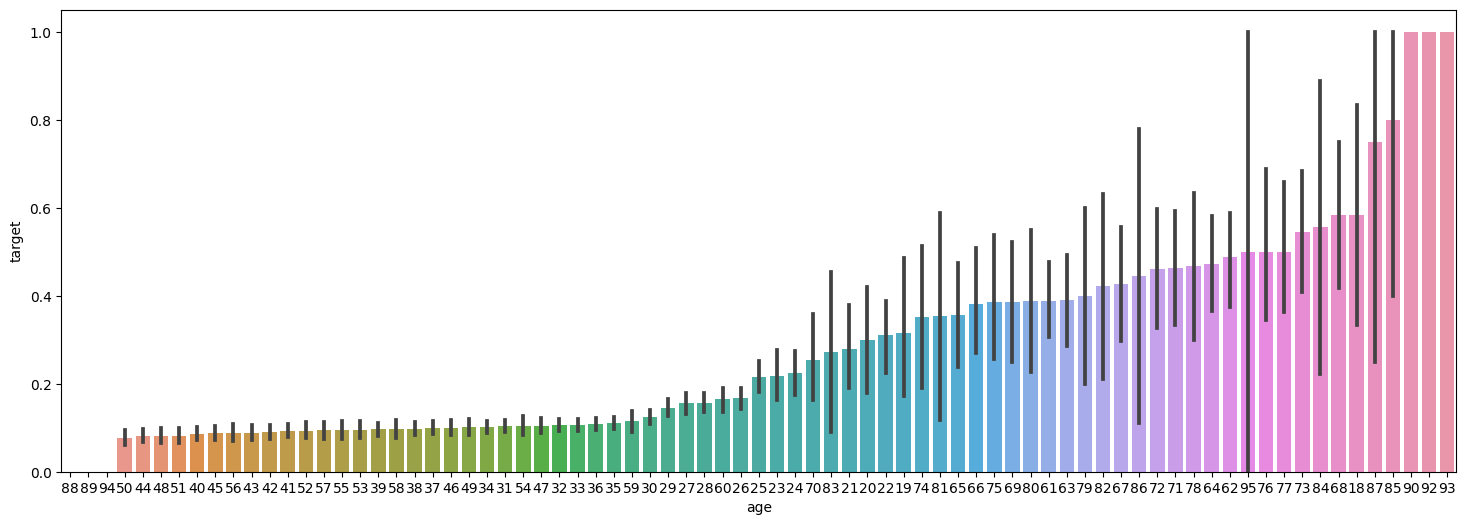

In [ ]:
age_conversion_rates = data.groupby('age')['target'].mean()
sorted_age = age_conversion_rates.reset_index().sort_values('target')['age']
plt.figure(figsize=(18,6))
sns.barplot(x='age',y='target', data = data, order = sorted_age)

In [ ]:
data.job.unique

<bound method Series.unique of 0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object>

In [ ]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<Axes: xlabel='job', ylabel='target'>

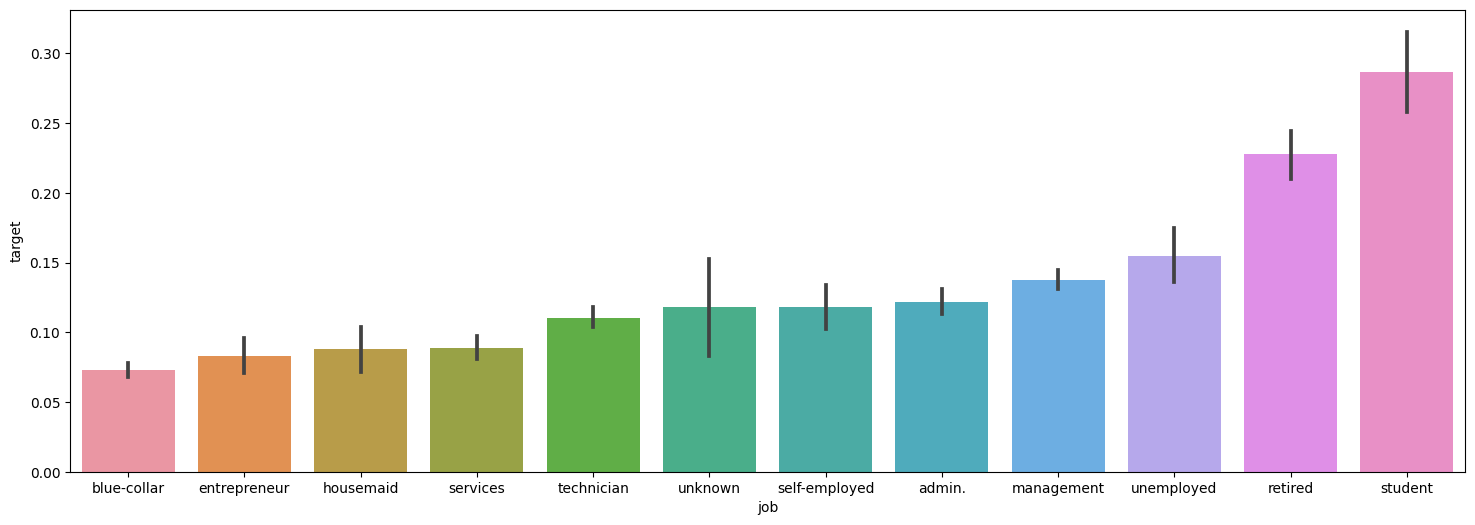

In [ ]:
job_conversion_rates=data.groupby('job')['target'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('target')['job']
plt.figure(figsize=(18,6))
sns.barplot(x='job',y='target', data = data, order = sorted_jobs)

Student category has the highest conversion rate followed by retired, unemployed and so on.

In [ ]:
data1=data

In [ ]:
data.job = data1.job.str.replace('unknown','blue-collar')

In [ ]:
data1['job'] = data1['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4, 'self-employed':5, 'admin.':6,
                                 'management':7, 'unemployed':8, 'retired':9, 'student':10})

In [ ]:
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,4,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,1,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,0,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,0,single,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,9,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,9,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,0,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [ ]:
data1.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

<Axes: xlabel='marital', ylabel='target'>

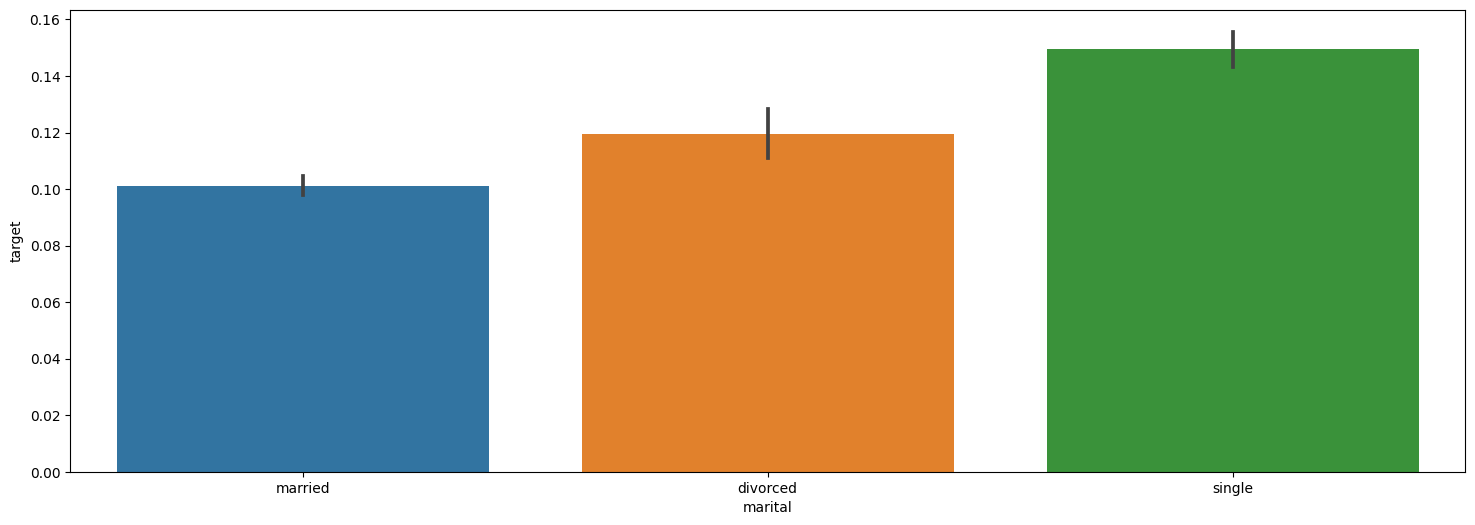

In [ ]:
marital_conversion_rates=data.groupby('marital')['target'].mean()
sorted_marital = marital_conversion_rates.reset_index().sort_values('target')['marital']
plt.figure(figsize=(18,6))
sns.barplot(x='marital',y='target', data = data, order = sorted_marital)

Single category has the highest conversion rate followed by divorced and married (with minor conversion rate difference)

In [ ]:
data1.marital = data1['marital'].map({'married':0, 'divorced':1, 'single':2})
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,4,2,secondary,unknown,5,may,151,1,unknown,no,0
2,33,1,0,secondary,unknown,5,may,76,1,unknown,no,0
3,47,0,0,unknown,unknown,5,may,92,1,unknown,no,0
4,33,0,2,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,9,1,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,9,0,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,0,0,secondary,telephone,17,nov,508,4,unknown,no,0


In [ ]:
data1['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
data1['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
data.education_qual = data1.education_qual.str.replace('unknown', 'secondary')
data.education_qual.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

<Axes: xlabel='education_qual', ylabel='target'>

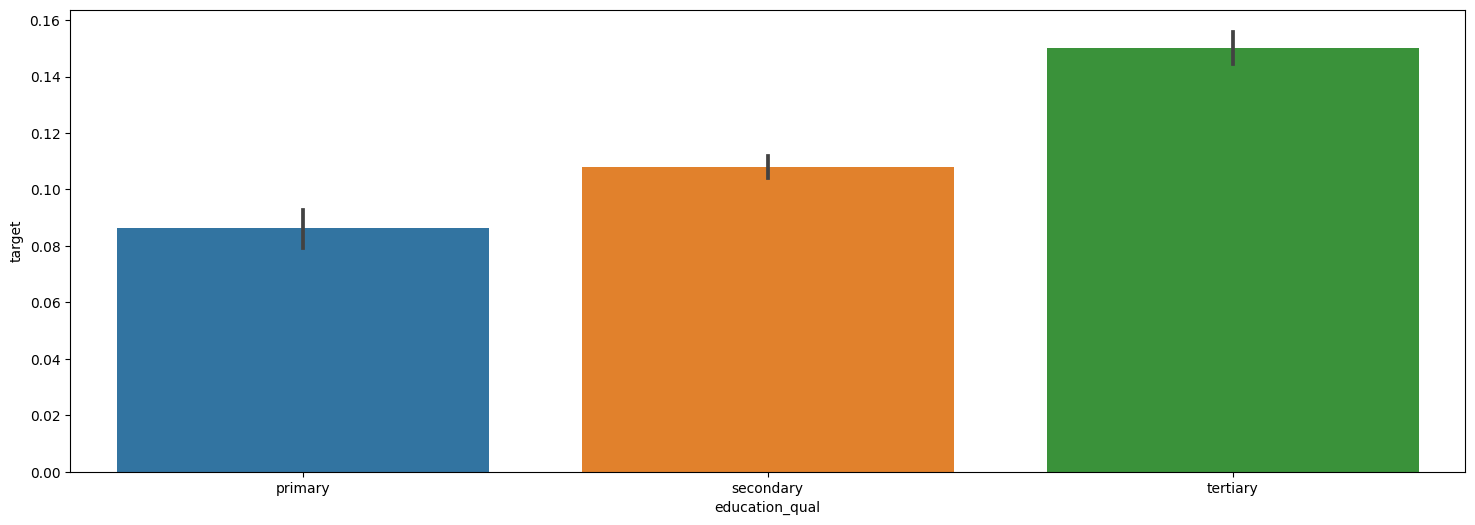

In [ ]:
education_qual_conversion_rates=data.groupby('education_qual')['target'].mean()
sorted_education_qual = education_qual_conversion_rates.reset_index().sort_values('target')['education_qual']
plt.figure(figsize=(18,6))
sns.barplot(x='education_qual',y='target', data = data, order = sorted_education_qual)

Tertiary category has the highest conversion rate followed by secondary and primary.

In [ ]:
data1.education_qual = data1['education_qual'].map({'primary':0, 'secondary':1, 'tertiary':2})
data1.education_qual.unique()

array([2, 1, 0])

In [ ]:
data1['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
data1['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

<Axes: xlabel='call_type', ylabel='target'>

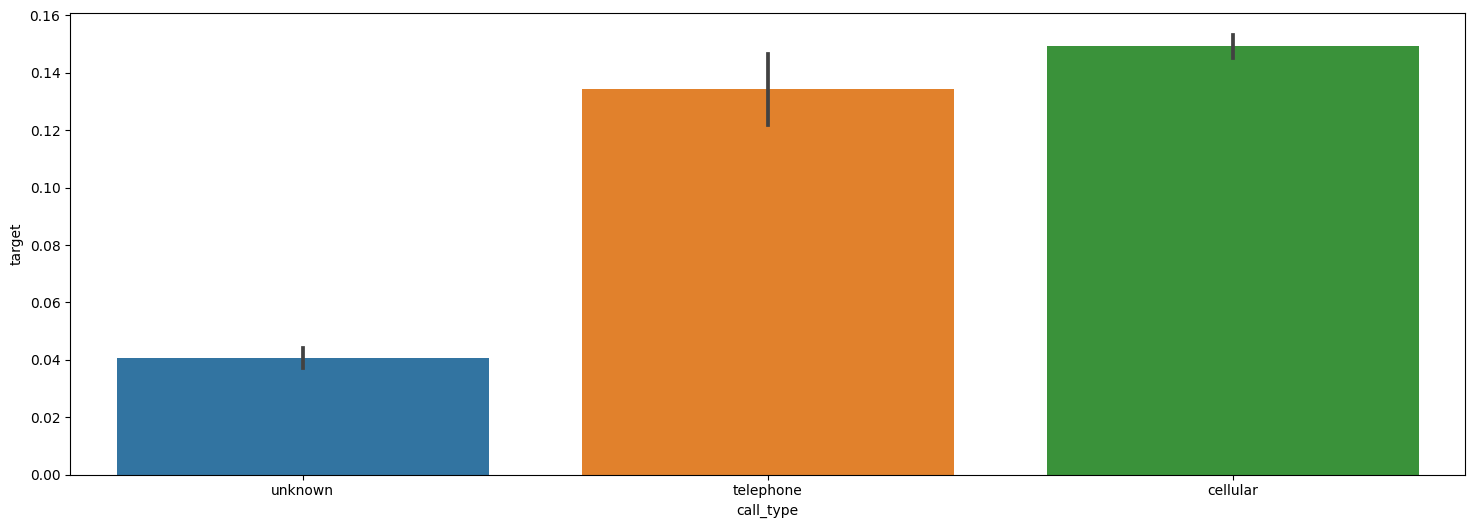

In [ ]:
call_type_conversion_rates=data.groupby('call_type')['target'].mean()
sorted_call_type = call_type_conversion_rates.reset_index().sort_values('target')['call_type']
plt.figure(figsize=(18,6))
sns.barplot(x='call_type',y='target', data = data, order = sorted_call_type)

Cellular has the highest conversion rate with very minor difference with telephone which has the second highest conversion rate and unknown being the third highest conversion rate.

In [ ]:
data1.call_type = data1['call_type'].map({'unknown':0, 'telephone':1, 'cellular':2})

In [ ]:
data1['day'].dtypes

dtype('int64')

In [ ]:
data1['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

<Axes: xlabel='day', ylabel='target'>

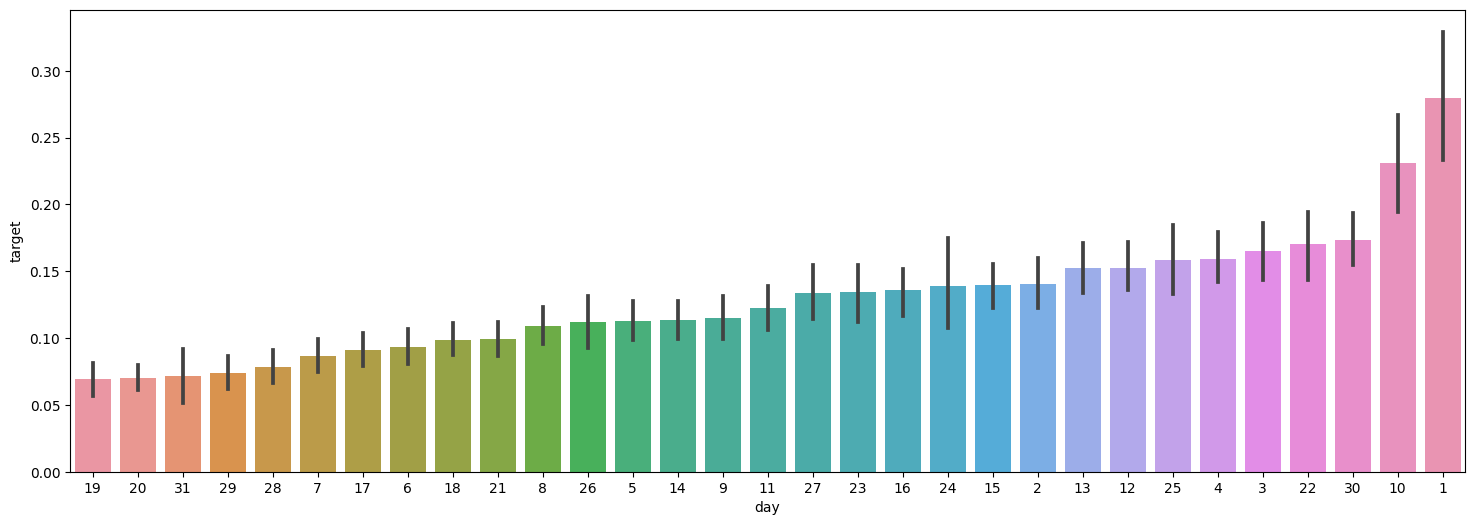

In [ ]:
day_conversion_rates=data.groupby('day')['target'].mean()
sorted_day = day_conversion_rates.reset_index().sort_values('target')['day']
plt.figure(figsize=(18,6))
sns.barplot(x='day',y='target', data = data, order = sorted_day)

In [ ]:
data1['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
data1['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

<Axes: xlabel='mon', ylabel='target'>

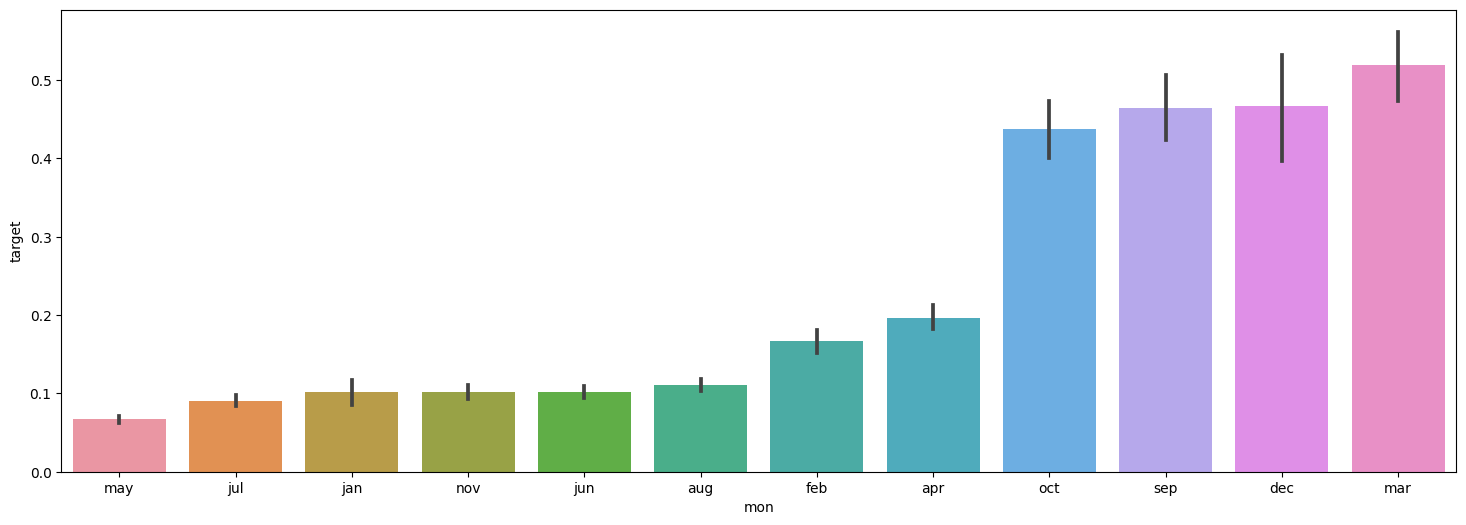

In [ ]:
mon_conversion_rates=data.groupby('mon')['target'].mean()
sorted_mon = mon_conversion_rates.reset_index().sort_values('target')['mon']
plt.figure(figsize=(18,6))
sns.barplot(x='mon',y='target', data = data, order = sorted_mon)

March has the highest conversion rate followed by december, september, october and so on.

In [ ]:
data1['mon']=data1['mon'].map({'may':0, 'jul':1, 'jan':2, 'nov':3, 'jun':4, 'aug':5, 'feb':6, 'apr':7, 'oct':8, 'sep':9,
                               'dec':10, 'mar':11})
data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261,1,unknown,no,0
1,44,4,2,1,0,5,0,151,1,unknown,no,0
2,33,1,0,1,0,5,0,76,1,unknown,no,0
3,47,0,0,1,0,5,0,92,1,unknown,no,0
4,33,0,2,1,0,5,0,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,unknown,yes,1
45207,71,9,1,0,2,17,3,456,2,unknown,yes,1
45208,72,9,0,1,2,17,3,1127,5,success,yes,1
45209,57,0,0,1,1,17,3,508,4,unknown,no,0


In [ ]:
data1['dur'].dtypes

dtype('int64')

In [ ]:
data1['dur'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [ ]:
data1['dur'].dropna()

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: dur, Length: 45211, dtype: int64

In [ ]:
data1['num_calls'].dtypes

dtype('int64')

<Axes: xlabel='num_calls', ylabel='target'>

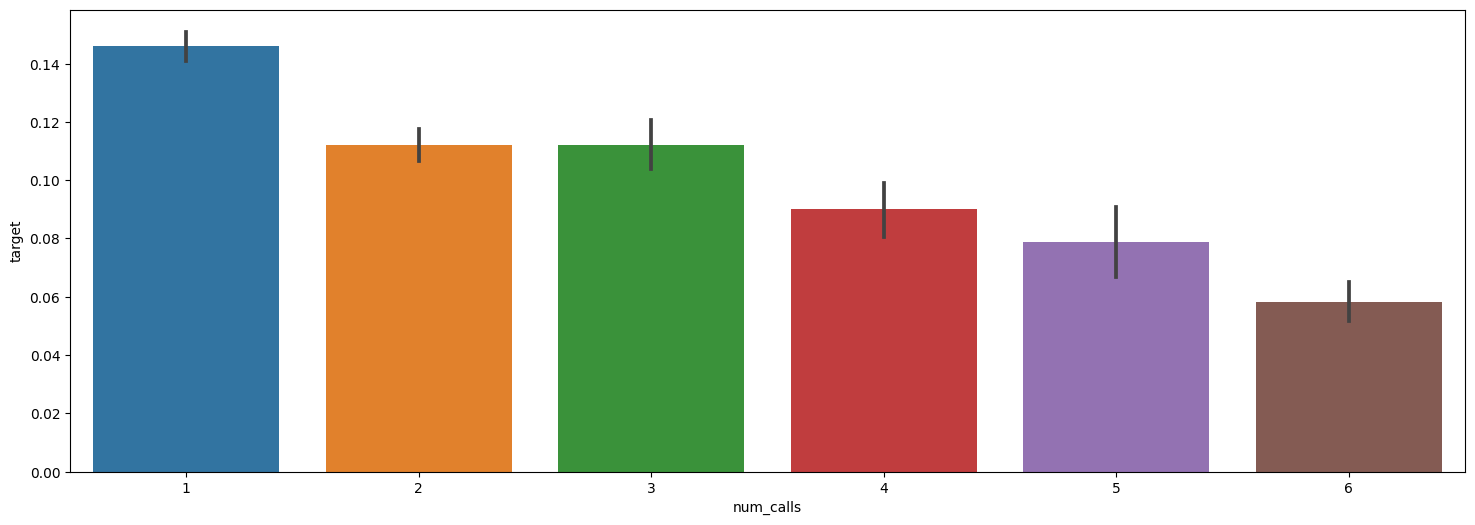

In [ ]:
data1['num_calls'] = data1.num_calls.clip(0,6)
num_calls_conversion_rates=data.groupby('num_calls')['target'].mean()
sorted_num_calls = num_calls_conversion_rates.reset_index().sort_values('num_calls')['num_calls']
plt.figure(figsize=(18,6))
sns.barplot(x='num_calls',y='target', data = data, order = sorted_num_calls)

Lesser the number of calls results in higher the conversion rate.

In [ ]:
data1['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
data1['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

<Axes: xlabel='prev_outcome', ylabel='target'>

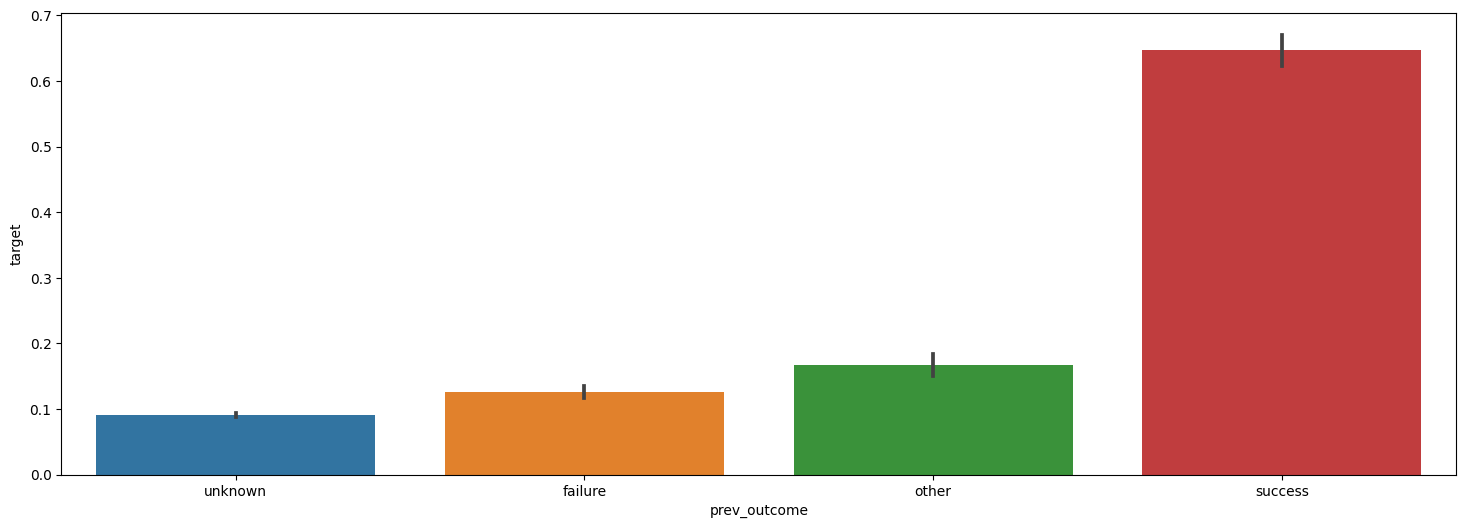

In [ ]:
prev_outcome_conversion_rates=data.groupby('prev_outcome')['target'].mean()
sorted_prev_outcome = prev_outcome_conversion_rates.reset_index().sort_values('target')['prev_outcome']
plt.figure(figsize=(18,6))
sns.barplot(x='prev_outcome',y='target', data = data1, order = sorted_prev_outcome)

In [ ]:
data1['prev_outcome'] = data1['prev_outcome'].map({'unknown':0, 'failure':1, 'other':2, 'success':3})

data1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261,1,NaN,0,0
1,44,4,2,1,0,5,0,151,1,NaN,0,0
2,33,1,0,1,0,5,0,76,1,NaN,0,0
3,47,0,0,1,0,5,0,92,1,NaN,0,0
4,33,0,2,1,0,5,0,198,1,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,NaN,1,1
45207,71,9,1,0,2,17,3,456,2,NaN,1,1
45208,72,9,0,1,2,17,3,1127,5,NaN,1,1
45209,57,0,0,1,1,17,3,508,4,NaN,0,0


In [ ]:
y = data1['y']
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

class 0: 39922
class 1: 5289
Proportion of class 0 is 88.3 %


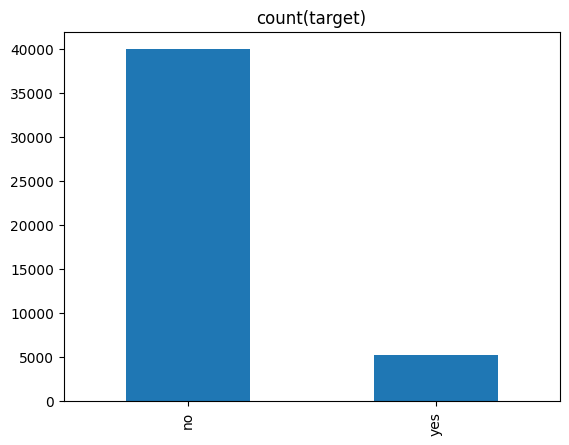

In [ ]:
target_count = y.value_counts()
print('class 0:', target_count[0])
print('class 1:', target_count[1])
print('Proportion of class 0 is', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2), '%')

target_count.plot(kind='bar', title = 'count(target)');

Imbalanced dataset

In [ ]:

X = data.iloc[:, :-2]
X

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58,7,0,2,0,5,0,261,1,0
1,44,4,2,1,0,5,0,151,1,0
2,33,1,0,1,0,5,0,76,1,0
3,47,0,0,1,0,5,0,92,1,0
4,33,0,2,1,0,5,0,198,1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,977,3,0
45207,71,9,1,0,2,17,3,456,2,0
45208,72,9,0,1,2,17,3,1127,5,3
45209,57,0,0,1,1,17,3,508,4,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 10), (9043, 10), (36168,), (9043,))

## scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_sclaed = scaler.transform(X_test)

In [ ]:
smt = SMOTEENN(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
print(len(X_train))
print(len(y_train))

53845
53845


## **Logistic Regression**

In [ ]:
y_train = y_train.map({'no': 0, 'yes': 1})
y_test = y_test.map({'no': 0, 'yes': 1})
Lr=LogisticRegression()
Lr.fit(X_train, y_train)
Lr.score(X_train, y_train)
y_pred = Lr.predict(X_test)
print("Training Accuracy:", Lr.score(X_train, y_train))
print("f1 score:", f1_score(y_test, y_pred))

Training Accuracy: 0.8734887176153775
f1 score: 0.43309116475275367


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train))
    dt = DecisionTreeClassifier(max_depth=depth)
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    roc = roc_auc_score(y_test, y_pred)

    print("Depth : ",depth, "Training Accuracy : ", trainAccuracy, "Cross Val Score : ", np.mean(valAccuracy))

Depth :  1 Training Accuracy :  0.7888569040765159 Cross Val Score :  0.7888566383976181
Depth :  2 Training Accuracy :  0.8012628842046615 Cross Val Score :  0.8012624875658956
Depth :  3 Training Accuracy :  0.8566440709443773 Cross Val Score :  0.8566440127976425
Depth :  4 Training Accuracy :  0.8639242269477203 Cross Val Score :  0.863757062088433
Depth :  5 Training Accuracy :  0.8723372643699507 Cross Val Score :  0.8718172590198133
Depth :  6 Training Accuracy :  0.8868232890704801 Cross Val Score :  0.8854491108839285
Depth :  7 Training Accuracy :  0.9045965270684372 Cross Val Score :  0.8987280445792825
Depth :  8 Training Accuracy :  0.9165382115331043 Cross Val Score :  0.9106882181945611
Depth :  9 Training Accuracy :  0.9265669978642399 Cross Val Score :  0.9177269284416427
Depth :  10 Training Accuracy :  0.9353328999907141 Cross Val Score :  0.9234656418619218
Depth :  20 Training Accuracy :  0.9956913362429195 Cross Val Score :  0.9492249810642903
Depth :  40 Training

In [ ]:
t = DecisionTreeClassifier(max_depth = 40)
t.fit(X_train, y_train)
y_pred = t.predict(X_test)
print("Training Accuracy : ",t.score(X_train, y_train) )
print("F1 score : ", f1_score(y_test,y_pred))

Training Accuracy :  1.0
F1 score :  0.49893649346703123


In [ ]:
X.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'],
      dtype='object')

## Feature Importance

In [ ]:
X_test = pd.DataFrame(X_test, columns = ['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'])
dtc = DecisionTreeClassifier(max_depth=20)
dtc.fit(X_train, y_train)
importance = dtc.feature_importances_
feature_importances = list(zip(X_test.columns, importance))
feature_importances.sort(key=lambda x: x[1], reverse=True)
for feature, importance in feature_importances:
    print(feature, " : ", importance)

dur  :  0.49881755554780566
mon  :  0.1449660992203915
call_type  :  0.08701777573049994
day  :  0.08450562732918324
age  :  0.06276550471457207
prev_outcome  :  0.04504421924976566
job  :  0.035619254937567915
num_calls  :  0.02595370357478707
marital  :  0.00811234353776366
education_qual  :  0.007197916157663396


The Feature Importances are 1) Duration
                            2) Month
                            3) Call_type
                            

## XG Boost

In [ ]:
import xgboost as xgb

for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.20,0.5,0.7,1]:
    model = xgb.XGBClassifier(learning_rate = i, n_estimators=100, verbosity=0 )
    model.fit(X_train, y_train)
    model.score(X_test, y_test)

    print("Learning rate : ", i, "Train Score : ", model.score(X_train, y_train), "Cross-val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01 Train Score :  0.915312470981521 Cross-val score :  0.9118768495945895
Learning rate :  0.02 Train Score :  0.9236883647506732 Cross-val score :  0.9208470712079257
Learning rate :  0.03 Train Score :  0.9303370786516854 Cross-val score :  0.926344321563531
Learning rate :  0.04 Train Score :  0.9349057479803139 Cross-val score :  0.9306158934412773
Learning rate :  0.05 Train Score :  0.9396044200947163 Cross-val score :  0.9342745933133834
Learning rate :  0.06 Train Score :  0.943671650106788 Cross-val score :  0.937394684342755
Learning rate :  0.07 Train Score :  0.9468288606184418 Cross-val score :  0.9408119383958246
Learning rate :  0.08 Train Score :  0.9500975020893305 Cross-val score :  0.9423348764729498
Learning rate :  0.09 Train Score :  0.9515646763859226 Cross-val score :  0.9444705727345095
Learning rate :  0.1 Train Score :  0.9536261491317671 Cross-val score :  0.9458634856054114
Learning rate :  0.11 Train Score :  0.9550190361222026 Cross-val

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(learning_rate = 1, n_estimators=100, verbosity =0 )
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
print("Training Accuracy : ", xg.score(X_train, y_train))
print("Testing Accuracy : ", xg.score(X_test, y_test))
print("F1 Score : ", f1_score(y_test,y_pred))


Training Accuracy :  0.9979199554276164
Testing Accuracy :  0.8385491540418003
F1 Score :  0.5463020509633314
